In [113]:
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt

In [114]:
#Gaussova metoda - přímá metoda
def gaussova_metoda(A,b):
    x = np.linalg.solve(A, b)
    return x

In [115]:
#Jakobiho metoda
def jakobiho_metoda(A,b,niteraci,x0):
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D
    return x

In [138]:
#vygenerování čtvercových matic
v = [1]
Gcasy1 = []
Jcasy1 = []
Gcasy2 = []
Jcasy2 = []

for i in range(2,200):
    m_jednicek = np.ones((i,i),dtype = int)
    m_cisel = np.full((i,i),i,dtype =int)
    nuly = np.triu(m_cisel,k = 1)
    M = nuly + m_jednicek
    v.append(i)
    l = np.array(v)

    
    for i in range(10):
        
        #čas zabraný výpočtem Gaussovou metodou
        c_z = time.perf_counter()
        vypocet_G =gaussova_metoda(M,l)
        c_k = time.perf_counter()
        cas = c_k - c_z
        Gcasy1.append(cas)
        
        x0 = np.ones(len(M))
        
        #čas zabraný výpočtem Jakobiho metodou
        Jc_z = time.perf_counter()
        vypocet_J = jakobiho_metoda(M,l,10,x0)
        Jc_k = time.perf_counter()
        Jcas = Jc_k - Jc_z
        Jcasy1.append(Jcas)
    
    Gcasy2.append(1000*(sum(Gcasy1)/len(Gcasy1)))
    Jcasy2.append(1000*(sum(Jcasy1)/len(Jcasy1)))       

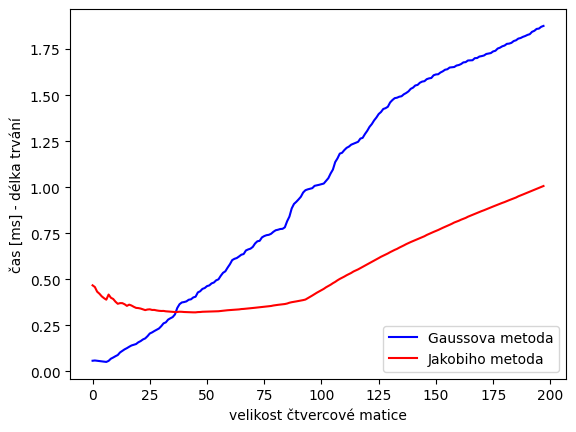

In [141]:
#tvorba grafu

plt.plot(Gcasy2,"b-",label = "Gaussova metoda")
plt.plot(Jcasy2,"r-",label = "Jakobiho metoda")

plt.xlabel("velikost čtvercové matice")                         
plt.ylabel("čas [ms] - délka trvání")

intersect_x = np.intersect1d(x1, x2)
intersect_y = np.intersect1d(y1, y2)

plt.legend(loc="lower right")

plt.show()